In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

import os
import sys
import math
import numpy.linalg

import scipy.stats as stat

import index_haps as idh

#Bulk VAFS first

In [2]:
#Import data
variant_annotations_amps = pd.read_csv('../Data/VAF_Data/bulkVAF_data.tsv', sep = '\t', index_col = 0)

In [3]:
#Create empty values for PD7151 missing amplicon
cs = list(variant_annotations_amps.columns)
blank1 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.1',
 'PD7151_TET2a',
 'PD7151']
blank2 = ['TARGET_NAME',
 'PATIENT',
 'CHR',
 'START',
 'END',
 'REF',
 'ALT',
 'GENE',
 'PROTEIN_CHANGE',
 'cDNA_CHANGE',
 'TARGET_VAF_MEAN',
 'Autotate_annot1',
 'Autotate_annot2',
 'VARIANT',
 'sampleID_short',
 'PD7151',
 'Neut',
 '-0.21',
 'PD7151_TET2b',
 'PD7151']
blank = pd.DataFrame(np.array([blank1, blank2]),columns=cs)

In [4]:
#Create a new df with the blank values and rearrange for plotting
var_ann_blank = pd.concat([variant_annotations_amps, blank])
var_ann_blank = var_ann_blank[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
var_ann_blank.sort_values(by=['Amplicon'], inplace = True)
var_ann_blank.sort_values(by=['celltype'], inplace = True)

In [5]:
#Rearrange again
patients = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

cell_order = ['BM', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

var_ann_blank['x_value'] = var_ann_blank['celltype'].map(cell_order_map)

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.08
#var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.08

var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.04
var_ann_blank.loc[var_ann_blank['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.04

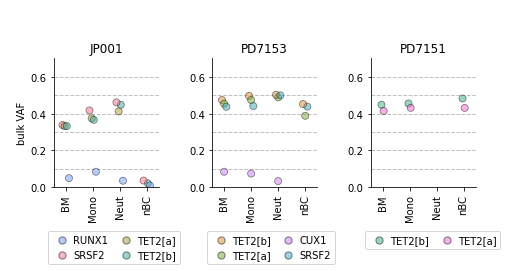

In [6]:
#Plot the VAFS
fig, (ax1,ax) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True)

#Adding dummy plot at top to match spacing exactly with scVAF plot
for count, patient in enumerate(patients):
    ax1[count].set_yscale('log')
    ax1[count].set_ylim(1, 1000)
    ax1[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax1[count].set_yticklabels(ax1labels, color = 'white') 
    #ax1[count].set_title(f'{patient}') 
    ax1[count].spines['top'].set_visible(False)
    ax1[count].spines['right'].set_visible(False)
    ax1[count].spines['bottom'].set_visible(False)
    ax1[count].spines['left'].set_visible(False)
    ax1[count].tick_params(axis='x', colors='white')
    ax1[count].tick_params(axis='y', colors='white')    
    if count != 0:
        ax1[count].set_yticklabels([])
    else:
        ax1[count].set_ylabel('Cell #', color = 'white')

for count, patient in enumerate(patients):
    plot_data = var_ann_blank.loc[var_ann_blank['patient_init'].isin([patient])]
    
                
    sns.scatterplot(x = 'x_value', y = 'Mean_VAF', data = plot_data,  s = 50, hue = 'Amplicon', palette = allVAFcols, alpha = 0.5, edgecolor = 'black', ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels()
    lbl = []
    for lb in labels[1:]:
        lbl.append(relabel[lb])    
    
    lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:], labels=lbl)
    #ax[count].set_title(f'{patient}') 
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax[count].margins(x=0.1)
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    ax[count].set_title(f'{patient}')

    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    if count == 0:
        ax[count].set_ylabel('bulk VAF')
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')

plt.rcParams['svg.fonttype'] = 'none'  
fig.tight_layout(h_pad = 0, w_pad = 2)     
fig.savefig('../Results/Bulk_VAFs.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/Bulk_VAFs.png',bbox_inches='tight', dpi = 600)

#Now the scVAFs

In [7]:
sourcefile = '../Data/Amp_data/allele_counts_anon.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'PD7151'
plate = idh.data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_PD7151 = idh.calc_scVAF_mod(plate, pt_id, reads)

PD7151
Cells with 10 reads for amplicon PD7151_TET2a  =  1230
Mono 508
Neut 175
CD34 324
nBC 223
Cells with 10 reads for amplicon PD7151_TET2b  =  3156
Mono 710
Neut 709
CD34 1033
nBC 704
{'PD7151_TET2b': 0, 'PD7151_TET2a': 1}


In [19]:
pt_id = 'PD7153'
plate = idh.data_retrieval(sourcefile, metadata, pt_id)
PD7153data = plate.copy()
reads = 10
plate1_PD7153 = idh.calc_scVAF_mod(plate, pt_id, reads)

PD7153
Cells with 10 reads for amplicon PD7153_SRSF2  =  1325
Mono 322
Neut 165
nBC 21
CD34 817
Cells with 10 reads for amplicon PD7153_TET2a  =  2158
Mono 548
Neut 614
nBC 59
CD34 937
Cells with 10 reads for amplicon PD7153_TET2b  =  1957
Mono 555
Neut 468
nBC 22
CD34 912
{'PD7153_TET2b': 0, 'PD7153_SRSF2': 1, 'PD7153_TET2a': 2}


In [9]:
pt_id = 'JP001'
plate = idh.data_retrieval(sourcefile, metadata, pt_id)
reads = 10
plate1_JP001 = idh.calc_scVAF_mod(plate, pt_id, reads)

JP001
Cells with 10 reads for amplicon JP001_RUNX1_g  =  2948
Mono 643
Neut 633
nBC 698
CD34 974
Cells with 10 reads for amplicon JP001_SRSF2  =  2618
Mono 643
Neut 260
nBC 737
CD34 978
Cells with 10 reads for amplicon JP001_TET2a  =  2872
Mono 634
Neut 647
nBC 692
CD34 899
Cells with 10 reads for amplicon JP001_TET2b_g  =  332
Mono 55
Neut 207
nBC 52
CD34 18
{'JP001_SRSF2': 0, 'JP001_TET2a': 1, 'JP001_TET2b_g': 2, 'JP001_RUNX1_g': 3}


In [10]:
#Combine data from all patients
frames = [plate1_JP001, plate1_PD7153, plate1_PD7151]
plate1_all = pd.concat(frames)

pt_test = []
for index, row in plate1_all.iterrows():
    pt_test.append(row['Amplicon'].split('_')[0])

plate1_all['Pt'] = pt_test

In [11]:
#Rearrange and include cell numbers
pts = ['JP001', 'PD7153', 'PD7151']

all_amps = ['JP001_SRSF2',
            'PD7153_TET2b',
            'JP001_TET2a',
            'PD7153_TET2a', 
            'PD7151_TET2b',
            'JP001_TET2b_g', 
            'PD7153_SRSF2', 
            'JP001_RUNX1_g',
            'PD7153_CUX1',
            'PD7151_TET2a'
           ]
short_label = ['SRSF2',
        'TET2[b]',
        'TET2[a]',
        'TET2[a]', 
        'TET2[b]',
        'TET2[b]', 
        'SRSF2', 
        'RUNX1',
        'CUX1',
        'TET2[a]'
       ]
relabel = dict(zip(all_amps, short_label))
colors = sns.color_palette('husl', n_colors = len(all_amps))
allVAFcols = dict(zip(all_amps, colors))

#Convert categoricals to numbers on x axis
cell_order = ['CD34', 'Mono', 'Neut', 'nBC']
cell_order_map = {x:i for i, x in enumerate(cell_order)}

plate1_all['x_value'] = plate1_all['sort_celltype'].map(cell_order_map)

#Nudge all the points by tweaking x value
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.12
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.12

plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.08
#plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
plate1_all.loc[plate1_all['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.08

plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.04
plate1_all.loc[plate1_all['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.04

In [12]:
bd_df = plate1_all.copy()
#Nudge all the points a bit further for bar plots
bd_df.loc[bd_df['Amplicon'] == 'JP001_SRSF2', 'x_value'] -= 0.15
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2a', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_TET2b_g', 'x_value'] += 0.05
bd_df.loc[bd_df['Amplicon'] == 'JP001_RUNX1_g', 'x_value'] += 0.15

bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2b', 'x_value'] -= 0.1
#bd_df.loc[bd_df['Amplicon'] == 'PD7153_TET2a', 'x_value'] -= 0.0
bd_df.loc[bd_df['Amplicon'] == 'PD7153_SRSF2', 'x_value'] += 0.1

bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2b', 'x_value'] -= 0.05
bd_df.loc[bd_df['Amplicon'] == 'PD7151_TET2a', 'x_value'] += 0.05

bar_data = bd_df.groupby(['Pt', 'sort_celltype', 'Amplicon']).mean()
bar_data['Pt'] = bar_data.index.get_level_values(0)
bar_data['Amplicon'] = bar_data.index.get_level_values(2)

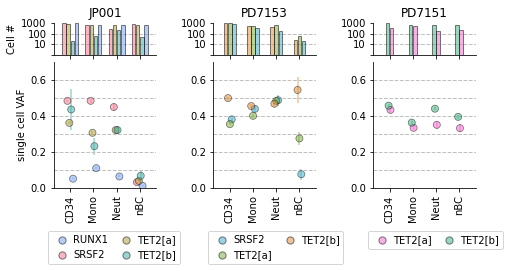

In [13]:
#plot the data
fig, (ax1,ax2) = plt.subplots(2, 3, figsize = (7,4), gridspec_kw = dict(height_ratios = [1,4]), sharex = True) 

ax = ax1
for count, pt in enumerate(pts):
    data = bar_data.loc[bar_data['Pt'].isin([pt])]
    
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['cell_count']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].bar([x], [y], width = 0.15, color = color, alpha = 0.5,  edgecolor = 'black')
    
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    ax[count].set_yscale('log')
    ax[count].set_ylim(1, 1000)
    ax[count].set_yticks([1, 10, 100, 1000])
    ax1labels = ['', 10, 100, 1000]
    ax[count].set_yticklabels(ax1labels)
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    if count == 0:
        ax[count].set_ylabel('Cell #')
    
    ax[count].axhline(10, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(100, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax = ax2

for count, pt in enumerate(pts):
    
    data = plate1_all.loc[plate1_all['Pt'].isin([pt])]
    
    sns.scatterplot(x = 'x_value', y = 'VAF', data = data, s = 50, hue = 'Amplicon', palette = allVAFcols,  edgecolor = 'black', alpha = 0.5, ax = ax[count])
    handles, labels = ax[count].get_legend_handles_labels() 
    
    #Plot sem bars
    for i, row in data.iterrows():
        x = row['x_value']
        y = row['VAF']
        e = row['sem']
        color = allVAFcols[row['Amplicon']]
        
        ax[count].errorbar(x, y, yerr=e, fmt='.', color = color, ms = 0, alpha = 0.5, zorder = 0)
    
    #rename labels for amplicons
    lbl = [] 
    for lb in labels:
        if lb not in all_amps:
            lbl.append(lb)
        else:
            lbl.append(relabel[lb])
                
    
    if pt == 'JP001':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:5], labels=lbl[1:5])
    elif pt == 'PD7153':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:4], labels=lbl[1:4])
    elif pt == 'PD7151':
        lgd = ax[count].legend(loc = 'upper left', bbox_to_anchor = [-0.1,-0.3], columnspacing = 0.8, handletextpad=0.1, ncol = 2, markerscale = 1.2, handles=handles[1:3], labels=lbl[1:3])
    
    ax[count].set_ylim(0,0.7)
    ax[count].axhline(0.1, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.2, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.3, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.4, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.5, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].axhline(0.6, ls = '--', c = 'silver', lw = 1, zorder = 0)
    ax[count].set_ylabel('')
    ax[count].set_xlabel('')
    ax[count].tick_params(axis='x', labelrotation = 90)
    ax1[count].set_title(f'{pt}')
    ax[count].margins(x=0.1)
    
    if count == 0:
        ax[count].set_ylabel('single cell VAF')

        
    
    #Manually adjust ticks and labels since now plotting at arbitrary x values
    ax[count].set_xticks(np.arange(len(cell_order)))
    ax[count].set_xticklabels(cell_order)
    
    ax[count].spines['top'].set_visible(False)
    ax[count].spines['right'].set_visible(False)
    
    for lh in lgd.legendHandles: 
        lh.set_alpha(0.5)
        lh.set_edgecolor('black')
        
plt.rcParams['svg.fonttype'] = 'none'    
fig.tight_layout(h_pad = 0, w_pad = 2)  
fig.savefig('../Results/sc_VAFs_cell_no.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/sc_VAFs_cell_no.png',bbox_inches='tight', dpi = 600)

#Now plot sc vs bulk

In [14]:
#bulk data
bulk_data = variant_annotations_amps.copy()
bulk_data = bulk_data[['celltype', 'Mean_VAF', 'Amplicon', 'patient_init']]
bulk_data.columns = ['ct', 'b_VAF', 'amplicon', 'pt']
bulk_data['b_ct'] = bulk_data['ct']
bulk_data.shape[0]

36

In [15]:
#sc data
sc_data = plate1_all.copy()
sc_data.columns = ['s_VAF', 'ct', 'amplicon', 's_sem', 's_count', 'pt', 'offset']
sc_data['s_ct'] = sc_data['ct'] #retain old designation for QC
#Rename CD34 to BM for merging
s_rename = {'CD34':'BM'}
sc_data['ct'].replace(s_rename, inplace = True)
sc_data.shape[0]
#sc_data

36

In [16]:
#Merge data
all_VAF = sc_data.merge(bulk_data, on = ['pt', 'ct', 'amplicon'])

All pt/amps (0.8377920247659048, 1.1937224982658664e-09)
JP001 (0.9024018590637137, 4.184677552895131e-06)
PD7153 (0.5721370202515634, 0.05191245444355426)
PD7151 (0.05057438580517759, 0.9242031000776822)


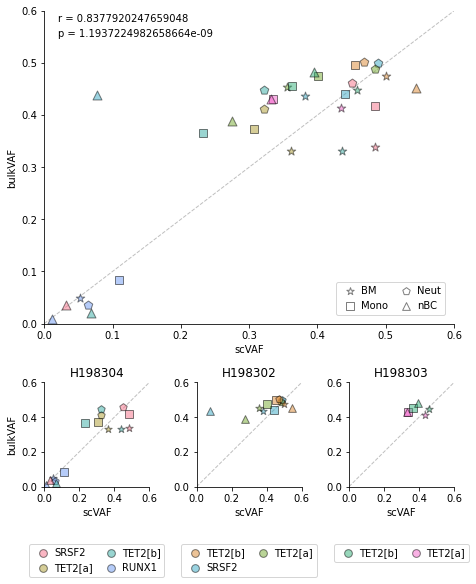

In [17]:
#Plot correlations
#TODO - plot line of fit (but not sure exactly how Fabio suggested to do this)

pts = ['JP001', 'PD7153', 'PD7151']
alt_id = ['H198304', 'H198302', 'H198303']
pt_label = dict(zip(pts, alt_id))
m_shapes = ['*', 's', 'p', '^' ]
cs = ['BM', 'Mono', 'Neut', 'nBC']
m_style = dict(zip(cs, m_shapes))

print('All pt/amps', stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF']))
rs = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[0]
pv = stat.pearsonr(all_VAF['s_VAF'], all_VAF['b_VAF'])[1]

#Create proxy artists for legend
f,ax = plt.subplots()
JP001_labels = ['JP001_SRSF2', 'JP001_TET2a',  'JP001_TET2b_g',  'JP001_RUNX1_g']
JP001_handles = []
for lab in JP001_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    JP001_handles.append(line)
JP001_labels_r = [relabel.get(x) for x in JP001_labels]    

PD7153_labels = [ 'PD7153_TET2b',   'PD7153_SRSF2', 'PD7153_TET2a']
PD7153_handles = []
for lab in PD7153_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    PD7153_handles.append(line)
PD7153_labels_r = [relabel.get(x) for x in PD7153_labels]  

PD7151_labels = ['PD7151_TET2b', 'PD7151_TET2a']
PD7151_handles = []
for lab in PD7151_labels:
    line = ax.scatter([0], [0], label=lab, color=allVAFcols[lab], alpha = 0.5, s = 60, edgecolor = 'black')
    PD7151_handles.append(line)
PD7151_labels_r = [relabel.get(x) for x in PD7151_labels]  

cs_labels = ['BM', 'Mono', 'Neut', 'nBC']
cs_handles = []
for lab in cs_labels:
    marker = m_style[lab]
    line = ax.scatter([0], [0], label=lab, marker = marker, color = 'white', alpha = 0.5, s = 60, edgecolor = 'black')
    cs_handles.append(line)
plt.close(f)

#Create plots
    
#x_list = []
#y_list = []

fig = plt.figure(constrained_layout=True, figsize = (6.5, 8))
gs = fig.add_gridspec(2, 3, height_ratios = [3,1], hspace = 1)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1 :,0])
ax2 = fig.add_subplot(gs[1 :,1])
ax3 = fig.add_subplot(gs[1 :,2])

ax_names = [ax1, ax2, ax3]
an = dict(zip(pts, ax_names))

ax = ax0

#Upper plot

for i, row in all_VAF.iterrows():
    x = row['s_VAF']
    #x_list.append(x)
    y = row['b_VAF']
    #y_list.append(y)
    color = allVAFcols[row['amplicon']]
    marker = m_style[row['ct']]
    ax.scatter(x, y, color = color, alpha = 0.5, marker = marker, s = 80, edgecolor = 'black')

#Plot 1:1 correlation line
x = np.array([0, 0.2, 0.4, 0.6])
ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)

ax.set_ylim(0,0.6)
ax.set_xlim(0,0.6)
ax.margins(x=0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('bulkVAF')
ax.set_xlabel('scVAF')
#ax.text(0.3, 0.05, f'r = {rs}') #bottom right location
#ax.text(0.3, 0.02, f'p = {pv}') #bottom right location

ax.text(0.02, 0.58, f'r = {rs}') #upper left location
ax.text(0.02, 0.55, f'p = {pv}') #upper left location

#ax.set_title('All patients, all amplicons')

#Lower plots

for count, pt in enumerate(pts):
    
    data = all_VAF.loc[all_VAF['pt'].isin([pt])]

    #x_list = []
    #y_list = []

    for i, row in data.iterrows():
        ax = an[pt]
        x = row['s_VAF']
        #x_list.append(x)
        y = row['b_VAF']
        #y_list.append(y)
        color = allVAFcols[row['amplicon']]
        marker = m_style[row['ct']]
        ax.scatter(x, y, color = color, alpha = 0.5, s = 60, marker = marker, edgecolor = 'black')
    
    #Plot 1:1 correlation line
    x = np.array([0, 0.2, 0.4, 0.6])
    ax.plot(x, x, ls = '--', c = 'silver', lw = 1, zorder = 0)
    
    ax.set_ylim(0,0.6)
    ax.set_xlim(0,0.6)
    ax.margins(x=0.1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('scVAF')
    label = pt_label[pt]
    ax.set_title(f'{label}')
    
    if pt == 'JP001':
        ax.set_ylabel('bulkVAF')
    
    print(pt, stat.pearsonr(data['s_VAF'], data['b_VAF']))
    
#Add legends
ax0.legend(handles = cs_handles, labels = cs_labels, loc = 'upper left',bbox_to_anchor = [0.7,0.15], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax1.legend(handles = JP001_handles, labels = JP001_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax2.legend(handles = PD7153_handles, labels = PD7153_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)
ax3.legend(handles = PD7151_handles, labels = PD7151_labels_r, loc = 'upper center',bbox_to_anchor = [0.5,-0.5], ncol = 2, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.savefig('../Results/allVAFs_composite.svg',bbox_inches='tight', dpi = 600)
fig.savefig('../Results/allVAFs_composite.png',bbox_inches='tight', dpi = 600)

In [20]:
PD7153data

Reads   Plate Well        Amplicon Genotype  \
AS-202 A1  PD7153_SRSF2   MT    0.0  AS-202   A1    PD7153_SRSF2       MT   
                          WT    0.0  AS-202   A1    PD7153_SRSF2       WT   
           PD7153_TET2a   MT    1.0  AS-202   A1    PD7153_TET2a       MT   
                          WT    0.0  AS-202   A1    PD7153_TET2a       WT   
           PD7153_TET2b   MT    1.0  AS-202   A1    PD7153_TET2b       MT   
...                             ...     ...  ...             ...      ...   
AS-210 P24 PD7153_TET2b   MT    4.0  AS-210  P24    PD7153_TET2b       MT   
                          WT   21.0  AS-210  P24    PD7153_TET2b       WT   
           PD7153_TGFB3_c WT    0.0  AS-210  P24  PD7153_TGFB3_c       WT   
           PD7153_TGFB3_g MT    0.0  AS-210  P24  PD7153_TGFB3_g       MT   
                          WT    0.0  AS-210  P24  PD7153_TGFB3_g       WT   

                              Cell_type  Plate_Well  
AS-202 A1  PD7153_SRSF2   MT  Monocytes   AS-202_A1  
                          WT  Monocytes   AS-202_A1  
           PD7153_TET2a   MT  Monocytes   AS-202_A1  
                          WT  Monocytes   AS-202_A1  
           PD7153_TET2b   MT  Monocytes   AS-202_A1  
...                                 ...         ...  
AS-210 P24 PD7153_TET2b   MT  CD34+/38-  AS-210_P24  
                          WT  CD34+/38-  AS-210_P24  
           PD7153_TGFB3_c WT  CD34+/38-  AS-210_P24  
           PD7153_TGFB3_g MT  CD34+/38-  AS-210_P24  
                          WT  CD34+/38-  AS-210_P24  

[33408 rows x 7 columns]